In [1]:
import pandas as pd

In [2]:
import numpy as np


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.preprocessing import LabelEncoder

In [4]:
data = pd.read_csv('NutriCheck_Simulated_Dataset.csv')

In [5]:
label_encoder = LabelEncoder()
data['Malnutrition Risk'] = label_encoder.fit_transform(data['Malnutrition Risk'])

In [6]:
print(data[['Malnutrition Risk']])

     Malnutrition Risk
0                    0
1                    2
2                    2
3                    2
4                    0
..                 ...
495                  0
496                  2
497                  0
498                  0
499                  0

[500 rows x 1 columns]


In [7]:
x = data[['Age (months)', 'Weight (kg)', 'Height (cm)', 'Diet Quality (1-10)']]
y = data['Malnutrition Risk']

# Dividing dataset into Training and Testing data

In [8]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# Training the Model

In [9]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [10]:
y_pred = model.predict(x_test)

In [11]:
y_pred_rounded = np.round(y_pred).astype(int)
mse = mean_squared_error(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred_rounded)
print("Mean Squared Error:", mse)
print("Accuracy:", accuracy)

Mean Squared Error: 0.5140422183707745
Accuracy: 0.58


In [12]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Make predictions on the test set
y_pred = model.predict(x_test)

# Calculate and print evaluation metrics
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R-squared:", r2_score(y_test, y_pred))

Mean Absolute Error: 0.5628440115684821
Mean Squared Error: 0.5140422183707745
R-squared: 0.27343856060667926


# Data Visualization

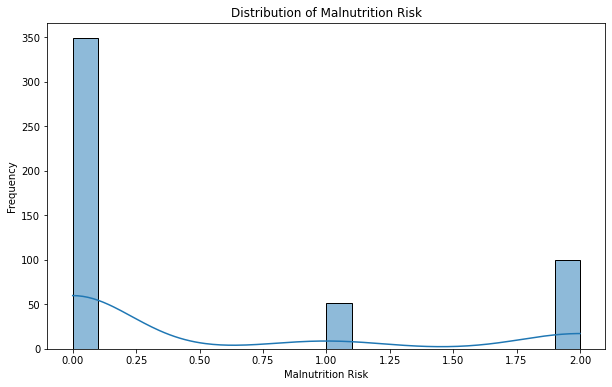

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizing the distribution of the target variable (e.g., Malnutrition Risk)
plt.figure(figsize=(10, 6))
sns.histplot(data['Malnutrition Risk'], bins=20, kde=True)
plt.title('Distribution of Malnutrition Risk')
plt.xlabel('Malnutrition Risk')
plt.ylabel('Frequency')
plt.show()


# Visualizing Actual vs. Predicted Value

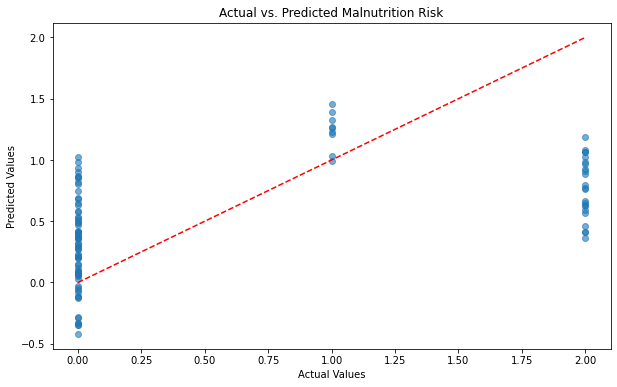

In [14]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Line for perfect prediction
plt.title('Actual vs. Predicted Malnutrition Risk')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()


In [15]:
pip install joblib


Note: you may need to restart the kernel to use updated packages.


In [16]:
import joblib

joblib.dump(model, 'nutricheck_model.pkl')

['nutricheck_model.pkl']

In [ ]:

# Load the saved model
model = joblib.load('nutricheck_model.pkl')


: 